#Telangana Kharif(Vanakalam) Season Rainfall Classification

#Mohammad Abdul Wahed

#Motivation
Every year, the Kharif (Vaanakalam) season starts from June in Telangana State.

This kharif season starts with the onset of monsoon season from Mrigasira karti in Telangana State.

Mrigasira karti starts between the first/second week ie, 8th June normally in Telangana State. 

The main crops cultivated in kharif season are Paddy, all varieties of Millets, all varieties of  Pulses and Jowar which requires a moderate/normal rainfall for better yield.

The farmers of Telangana and Andhra States will be waiting with expection of normal and moderate rainfall which will help them for sowing the seeds in Mrigasira karti with the onset of monsoon in June every year.

#Contents


*   Objective

*   Description of Dataset

*   Importing Libraries

*   Loading Data

*   Counting the number of null values

*   Imputing missing values using Multiple Imputation by Chained Equations(MICE)

*   Checking for Multicollinearity

*   Encoding 'Rain (mm)' to a categorical variable 

*   Checking for Outliers using Boxplot

*   Removing Outliers in Data using IQR

*   Declaring features and target variable

*   Scaling the data

*   Splitting the Data into train and test set

*   Balancing the Dataset using Synthetic Minority Oversampling Technique(SMOTE)

*   Fitting models using various ML algorithms(Random Forest, Logistic Regression, Gaussian Naive Bayes, K Nearest Neighbors, XGBoost, Support Vector Classifier), model evaluation and accuracy

*   Model Comparison using Accuracy








#Objective
The objective is to develop models that predict whether it will rain significantly or not based on meteorological measurements(Min Temp (°C),	Max Temp (°C),	Min Humidity (%),	Max Humidity (%),	Min Wind Speed (Kmph),	Max Wind Speed (Kmph)).



#Description of Dataset
This dataset is originally from the [Telangana's Open Data Platform](https://data.telangana.gov.in/) supported by the 'Open Data Policy' of the Government of Telangana.

This dataset provides information about the cumulative rainfall, minimum & maximum temperature, humidity & wind speed across all weather stations in the state of Telangana for the month of June in the year 2022.

The portal houses datasets form the various departments and organizations of the Government of Telangana.

The portal could be used by a variety of stakeholders and will enhance transparency in the working of the government apart from triggering innovative solutions to various problems.


*   'District': Name of the district,

*   'Mandal': Name of the Mandal,

*   'Date': Date in yyyy-mm-dd format,

*   'Rainfall (mm)': Cumulative Rainfall in mm,

*   'temp_min (⁰C)': Minimum Temperature in celcius,

*   'temp_max (⁰C)': Maximum Temperature in celcius,


*   'humidity_min (%)':Minimum Humidity %,


*   'humidity_max (%)': Maximum Humidity %,


*   'wind_speed_min (Kmph)': Minimum Wind Speed in kmph,


*   'wind_speed_max (Kmph)': Maximum Wind Speed in kmph.


In terms of rainfall, drizzle is typically defined as precipitation with an intensity of less than 1 mm per hour. In general, drizzle is considered to be a light and steady rainfall that doesn't produce much accumulation or cause significant impacts.

We encode values in feature "Rain (mm)" which are greater than 1 as '1' for rainfall and less than 1 as '0' for no rainfall and make a new categorical column 'rain_encoded' in dataframe





 


 




#Importing libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

#Loading the data

In [99]:
df = pd.read_csv("TS Weather data June 2022_0.csv")

In [101]:
df.tail()

,District,Mandal,Date,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
17815,Yadadri Bhuvanagiri,Yadagirigutta,26-Jun-22,8.2,22.9,32.7,40.6,98.7,0.0,9.2
17816,Yadadri Bhuvanagiri,Yadagirigutta,27-Jun-22,17.6,21.6,30.5,74.2,98.8,0.0,5.4
17817,Yadadri Bhuvanagiri,Yadagirigutta,28-Jun-22,1.7,23.6,29.6,70.0,97.5,0.0,4.9
17818,Yadadri Bhuvanagiri,Yadagirigutta,29-Jun-22,0.3,24.5,33.1,73.1,95.6,0.0,4.0
17819,Yadadri Bhuvanagiri,Yadagirigutta,30-Jun-22,0.0,25.1,34.4,47.9,94.2,0.0,5.3


In [100]:
df.describe()

,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
count,17820.000000,17820.000000,17820.000000,17820.000000,17819.000000,17633.000000,17633.000000
mean,4.891644,25.730118,36.357267,44.406279,84.115994,0.157336,10.715426
std,12.233046,2.396097,3.688255,16.136586,15.331137,0.649970,7.167985
min,0.000000,16.300000,27.300000,5.400000,28.400000,0.000000,0.100000
25%,0.000000,23.900000,33.200000,31.500000,72.900000,0.000000,6.200000
50%,0.000000,25.300000,35.900000,44.000000,88.600000,0.000000,10.200000
75%,3.000000,27.200000,39.200000,56.200000,98.300000,0.000000,14.300000
max,124.300000,34.100000,45.900000,99.900000,100.000000,12.700000,68.100000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17820 entries, 0 to 17819
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   District               17820 non-null  object 
 1   Mandal                 17820 non-null  object 
 2   Date                   17820 non-null  object 
 3   Rain (mm)              17820 non-null  float64
 4   Min Temp (°C)          17820 non-null  float64
 5   Max Temp (°C)          17820 non-null  float64
 6   Min Humidity (%)       17820 non-null  float64
 7   Max Humidity (%)       17819 non-null  float64
 8   Min Wind Speed (Kmph)  17633 non-null  float64
 9   Max Wind Speed (Kmph)  17633 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.4+ MB


#Counting the number of null values

In [103]:
df.isnull().sum()

District                   0
Mandal                     0
Date                       0
Rain (mm)                  0
Min Temp (°C)              0
Max Temp (°C)              0
Min Humidity (%)           0
Max Humidity (%)           1
Min Wind Speed (Kmph)    187
Max Wind Speed (Kmph)    187
dtype: int64

In [104]:
df = df.drop(df.columns[[0, 1, 2]],axis = 1)

In [105]:
df.head()

,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph)
0,0.0,32.3,42.2,27.0,62.7,0.3,12.9
1,0.0,30.0,43.0,24.6,62.4,0.0,12.7
2,0.0,33.6,44.5,19.3,55.4,0.0,15.0
3,0.5,34.1,44.6,22.4,46.8,0.0,14.8
4,0.0,32.3,40.8,25.1,50.2,0.0,16.8


#Imputing missing values using Multiple Imputation by Chained Equations(MICE)

In [ ]:
!pip install git+https://github.com/AnotherSamWilson/miceforest.git

In [107]:
import miceforest as mf

In [108]:
# Create kernel. 
kds = mf.ImputationKernel(
  df,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 5 iterations
kds.mice(5)

# Return the completed dataset.
df = kds.complete_data()

In [109]:
df.isnull().sum()

Rain (mm)                0
Min Temp (°C)            0
Max Temp (°C)            0
Min Humidity (%)         0
Max Humidity (%)         0
Min Wind Speed (Kmph)    0
Max Wind Speed (Kmph)    0
dtype: int64

#Checking for Multicollinearity

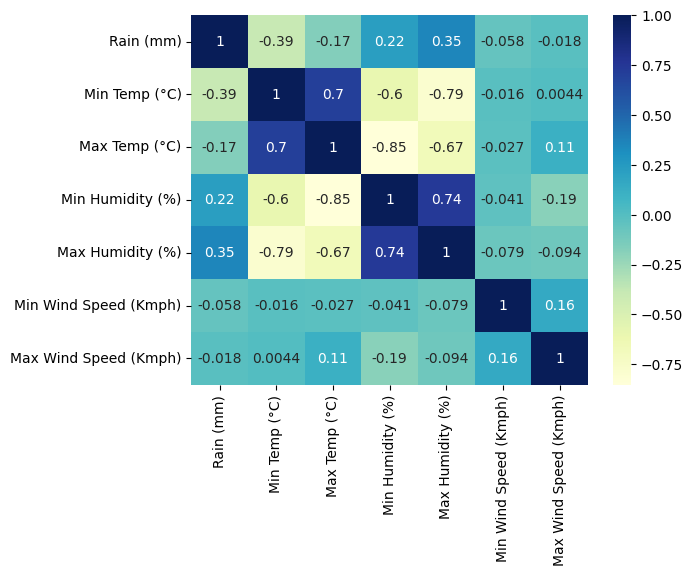

In [110]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

#Encoding 'Rain (mm)' to a categorical variable

Drizzle is defined as light precipitation consisting of small water droplets that fall to the ground slowly and evenly. In terms of rainfall, drizzle is typically defined as precipitation with an intensity of less than 1 mm per hour.
In general, drizzle is considered to be a light and steady rainfall that doesn't produce much accumulation or cause significant impacts.

In [111]:
df['rain_encoded'] = df['Rain (mm)'].apply(lambda x: 1 if x > 1 else 0)

In [112]:
df.tail()

,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),rain_encoded
17815,8.2,22.9,32.7,40.6,98.7,0.0,9.2,1
17816,17.6,21.6,30.5,74.2,98.8,0.0,5.4,1
17817,1.7,23.6,29.6,70.0,97.5,0.0,4.9,1
17818,0.3,24.5,33.1,73.1,95.6,0.0,4.0,0
17819,0.0,25.1,34.4,47.9,94.2,0.0,5.3,0


In [113]:
df.describe()

,Rain (mm),Min Temp (°C),Max Temp (°C),Min Humidity (%),Max Humidity (%),Min Wind Speed (Kmph),Max Wind Speed (Kmph),rain_encoded
count,17820.000000,17820.000000,17820.000000,17820.000000,17820.000000,17820.000000,17820.000000,17820.000000
mean,4.891644,25.730118,36.357267,44.406279,84.114624,0.158311,10.713659,0.322952
std,12.233046,2.396097,3.688255,16.136586,15.331798,0.653280,7.151650,0.467618
min,0.000000,16.300000,27.300000,5.400000,28.400000,0.000000,0.100000,0.000000
25%,0.000000,23.900000,33.200000,31.500000,72.900000,0.000000,6.200000,0.000000
50%,0.000000,25.300000,35.900000,44.000000,88.600000,0.000000,10.200000,0.000000
75%,3.000000,27.200000,39.200000,56.200000,98.300000,0.000000,14.300000,1.000000
max,124.300000,34.100000,45.900000,99.900000,100.000000,12.700000,68.100000,1.000000


We see that the mean of rain_encoded is 0.32 which means that the dataset is imbalanced. We use oversampling technique(SMOTE) to make our dataset balanced later in this notebook

Let's drop the "Rain (mm)" column

In [114]:
df = df.drop(df.columns[0],axis = 1)

#Checking for Outliers using Boxplot

A for loop is used to plot a boxplot for all the continuous features to see the outliers

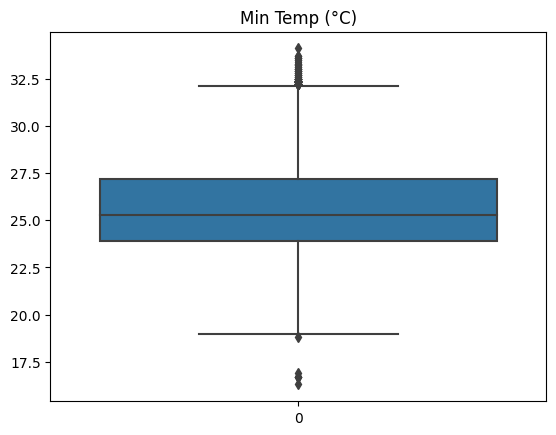

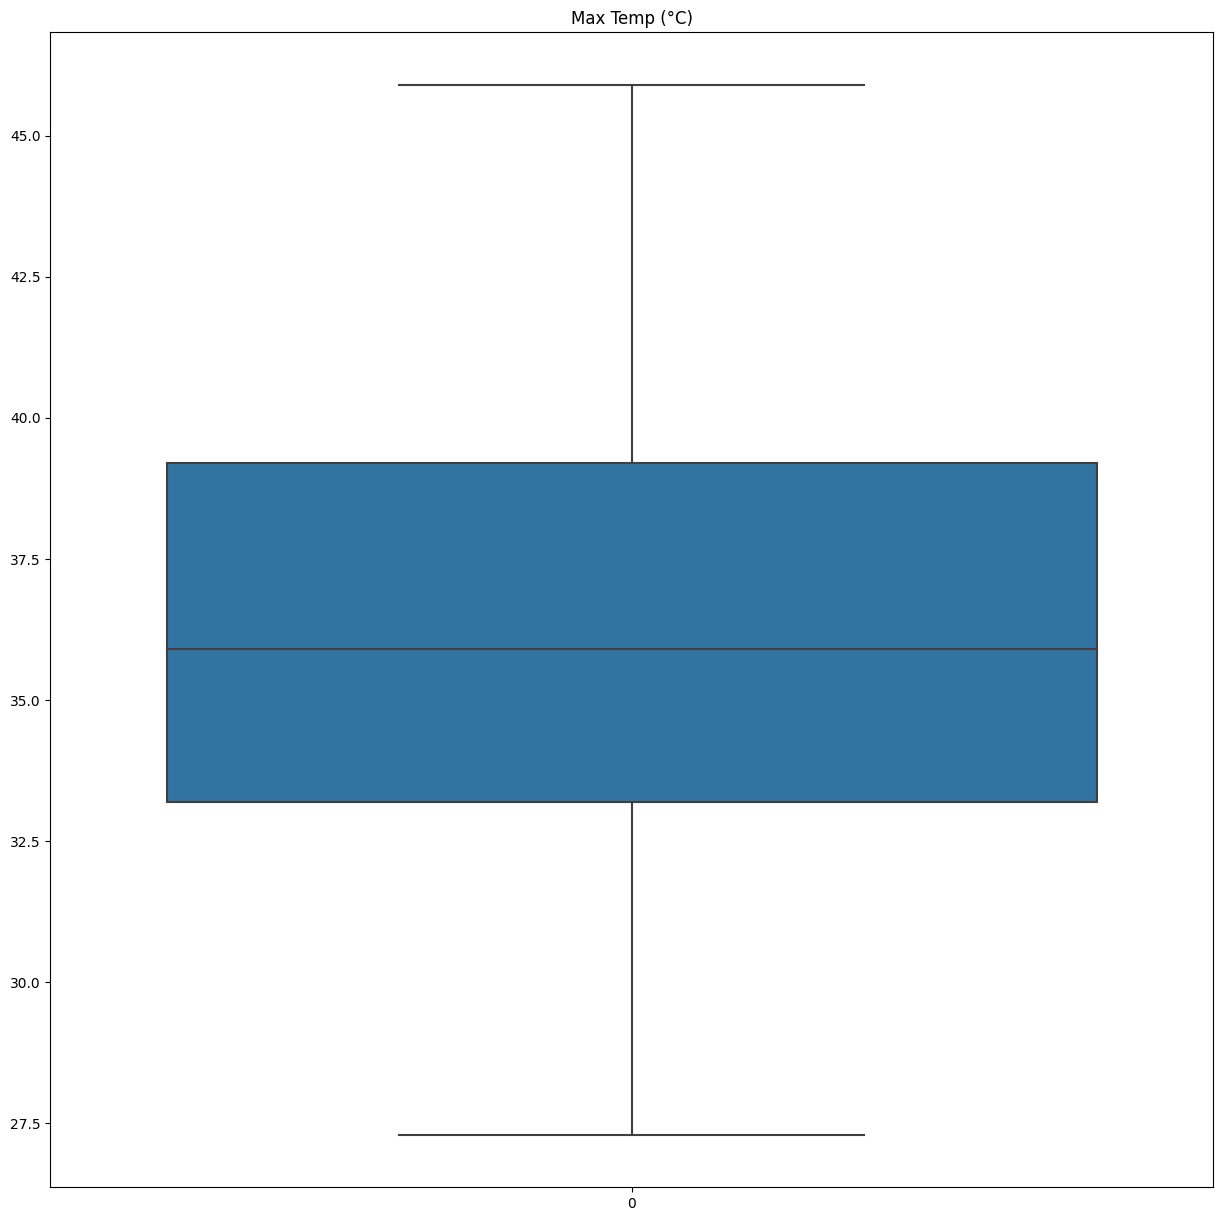

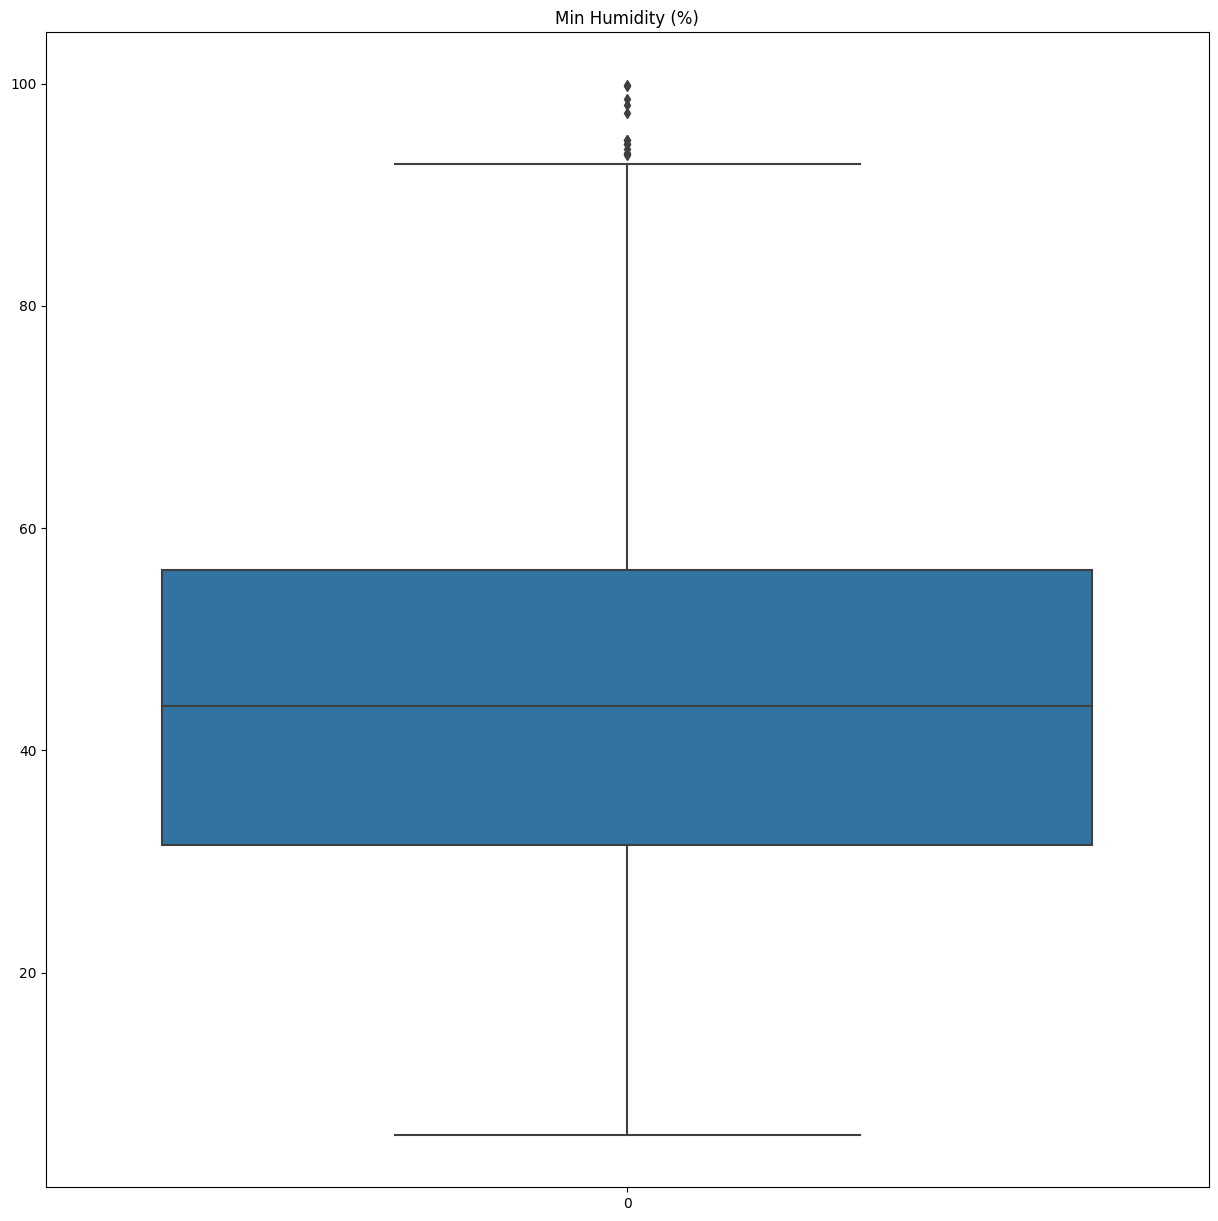

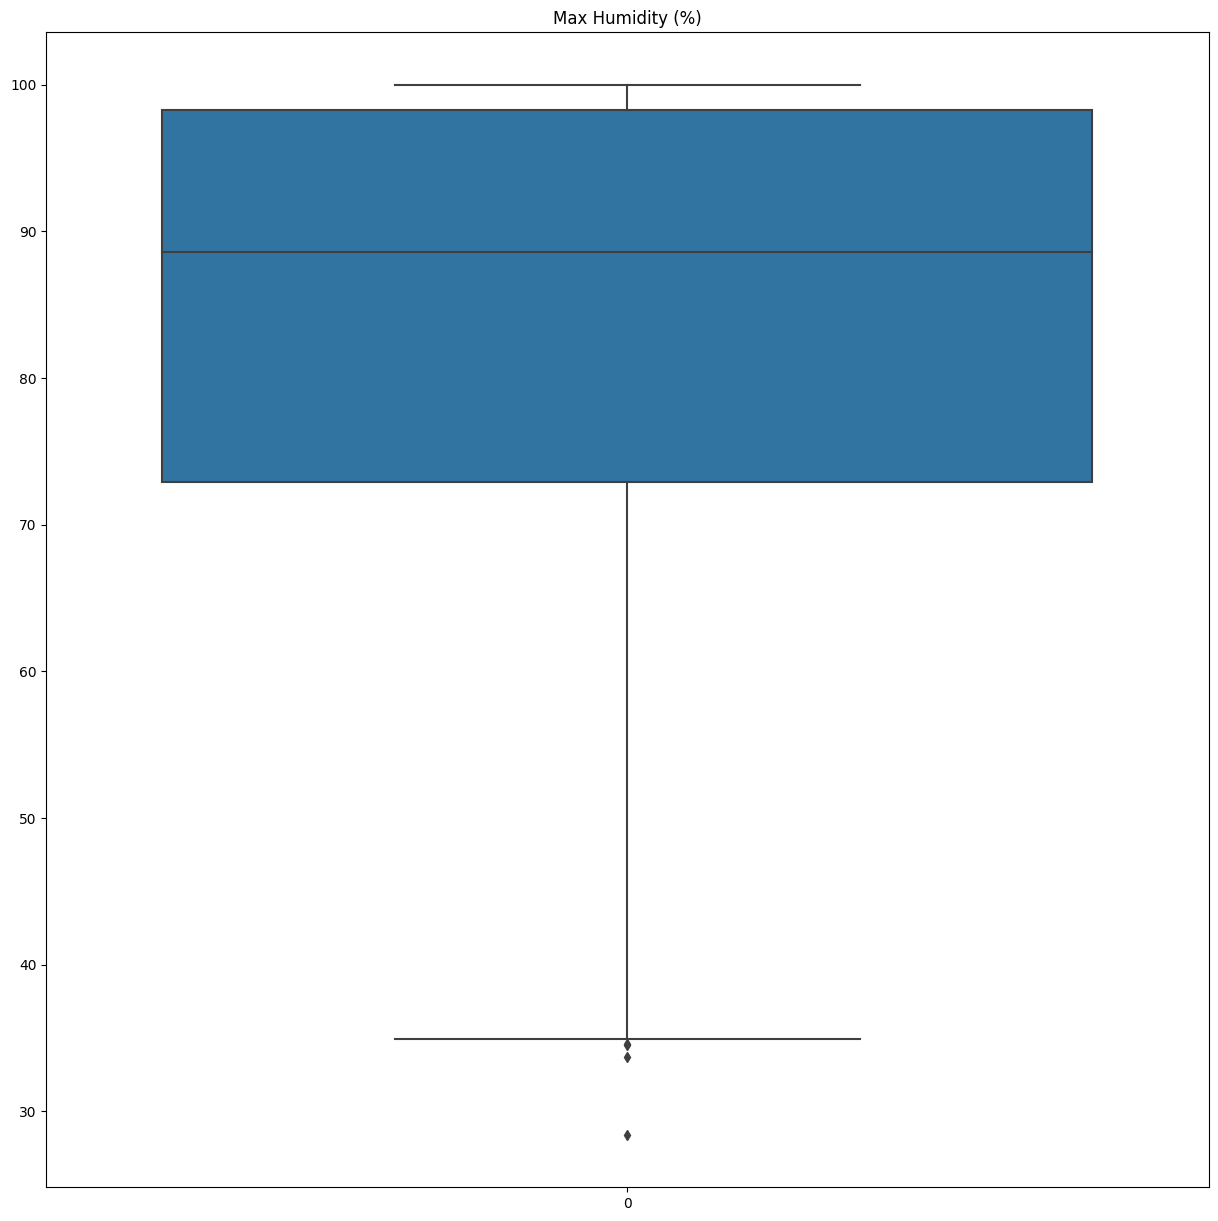

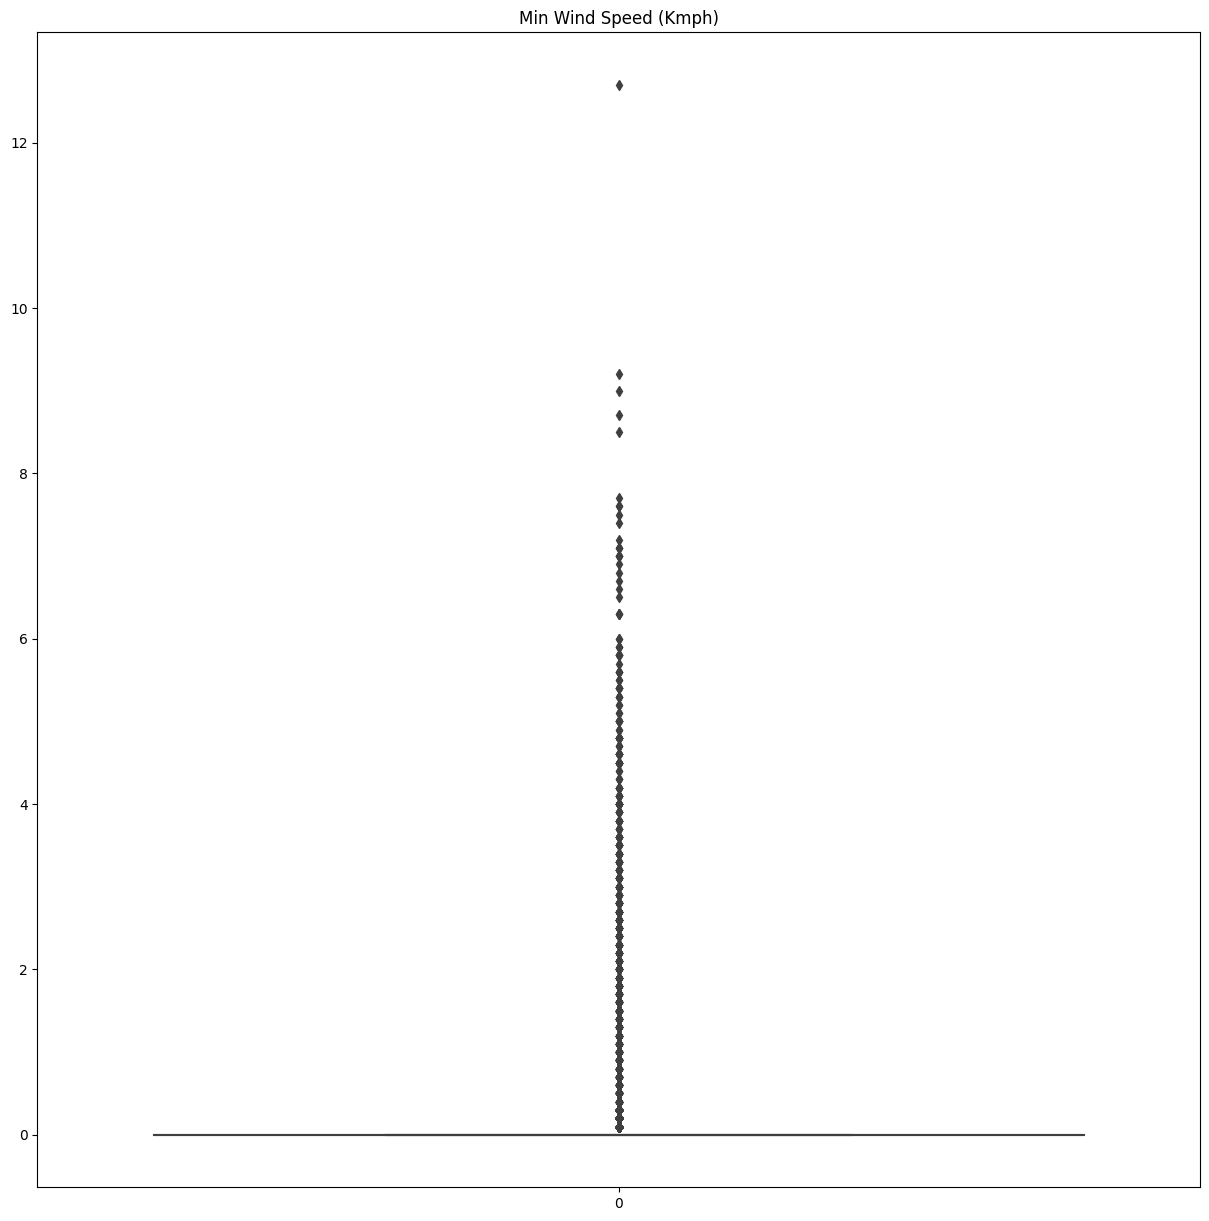

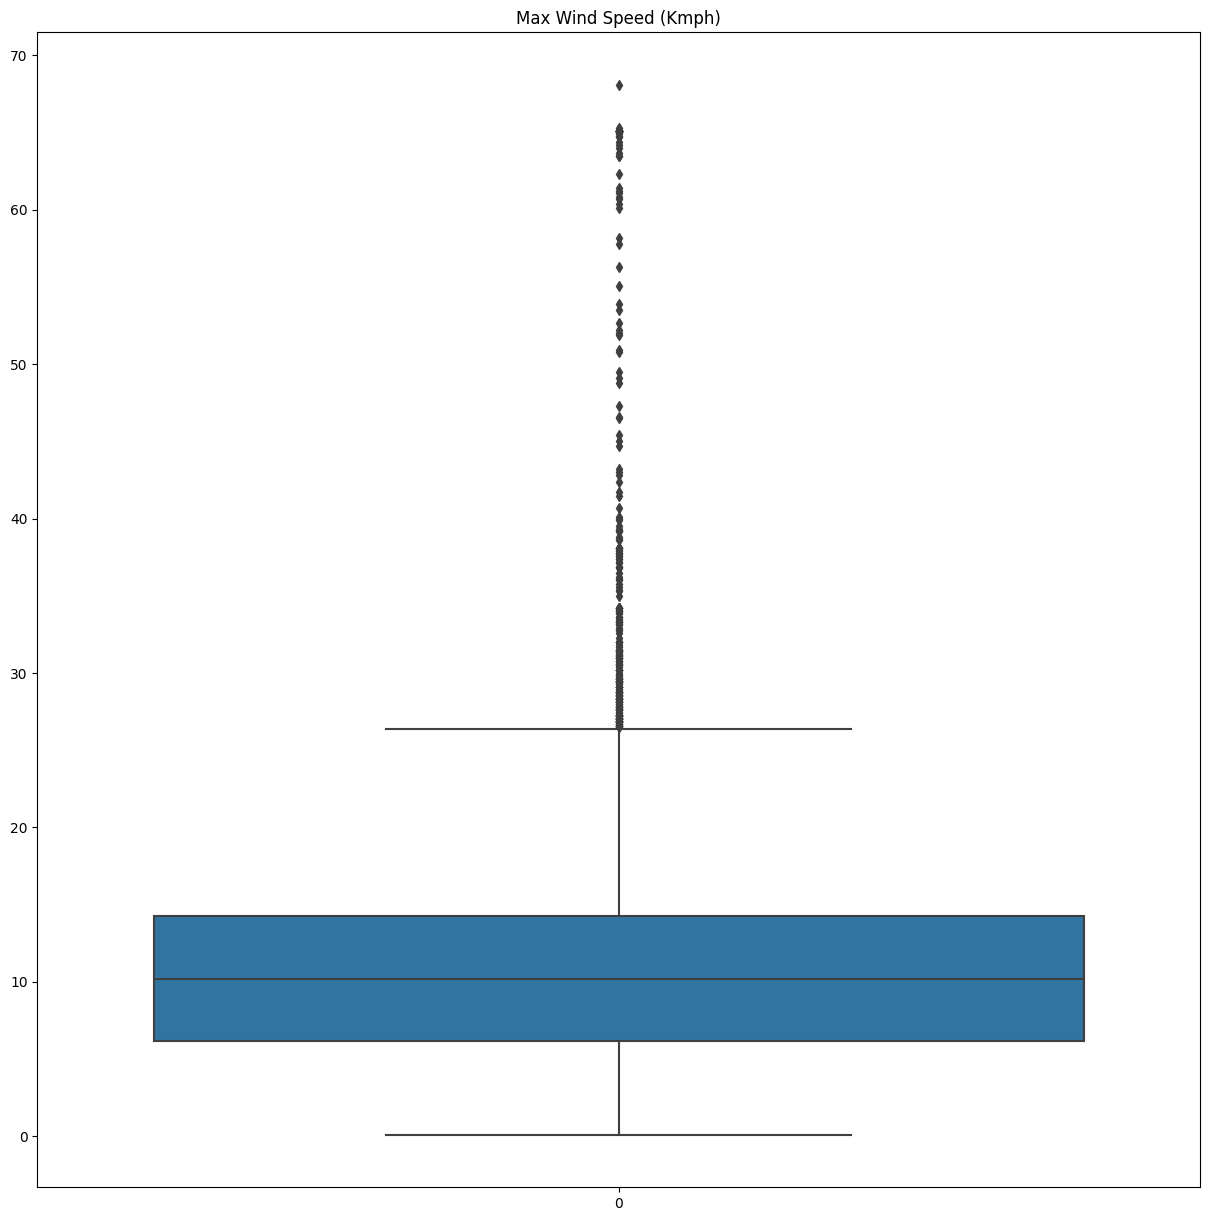

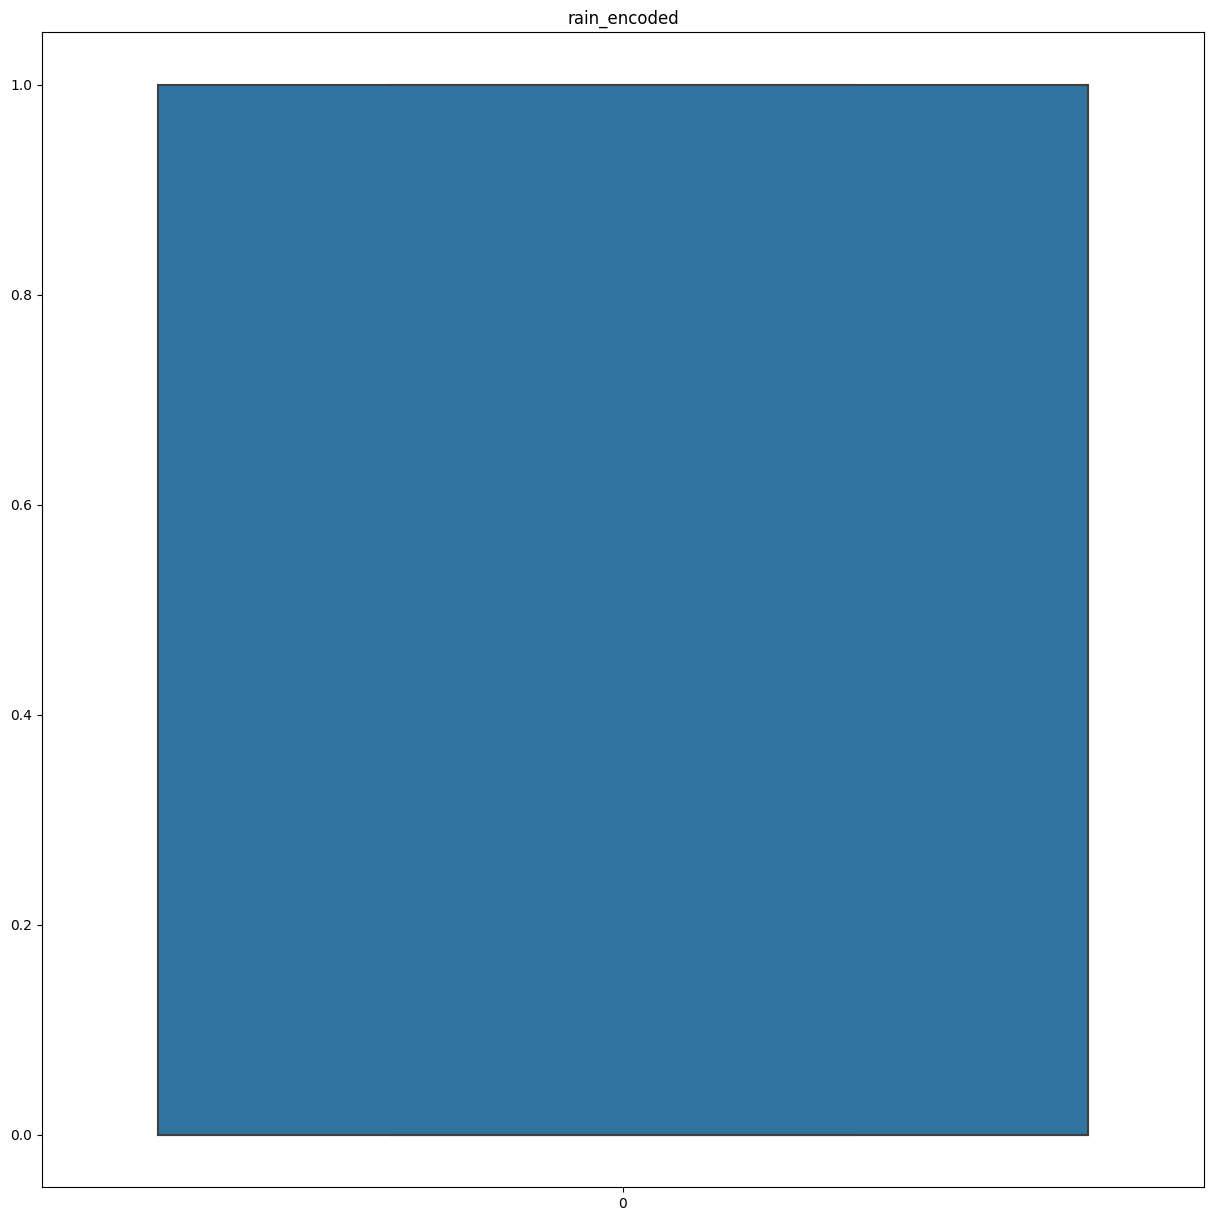

<Figure size 1500x1500 with 0 Axes>

In [115]:
for feature in df:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

#Removing Outliers in Data using IQR

In [116]:
for feature in df:
    print(feature)

Min Temp (°C)
Max Temp (°C)
Min Humidity (%)
Max Humidity (%)
Min Wind Speed (Kmph)
Max Wind Speed (Kmph)
rain_encoded


In [117]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [118]:
lower_bound = (Q1 - 1.5*IQR)
upper_bound = (Q3 + 1.5*IQR)


In [119]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [120]:
df.shape

(15067, 7)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15067 entries, 1 to 17819
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Min Temp (°C)          15067 non-null  float64
 1   Max Temp (°C)          15067 non-null  float64
 2   Min Humidity (%)       15067 non-null  float64
 3   Max Humidity (%)       15067 non-null  float64
 4   Min Wind Speed (Kmph)  15067 non-null  float64
 5   Max Wind Speed (Kmph)  15067 non-null  float64
 6   rain_encoded           15067 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.4 MB


#Declaring features and target variable

In [125]:
X = df.drop(["rain_encoded"], axis=1)

In [126]:
Y = df["rain_encoded"]

#Scaling the Data

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the Data into train and test set

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size =0.2, stratify = Y, random_state = 0)

#Balancing the Dataset using Synthetic Minority Oversampling Technique(SMOTE)

In [129]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 7964, 1: 4089})
The number of classes after fit Counter({1: 7964, 0: 7964})


#Fitting models using various ML algorithms(Random Forest, Logistic Regression, Gaussian Naive Bayes, K Nearest Neighbors, XGBoost, Support Vector Classifier), model evaluation and accuracy

In [130]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [131]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[1688  304]
 [ 208  814]]
0.8301260783012607
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1992
           1       0.73      0.80      0.76      1022

    accuracy                           0.83      3014
   macro avg       0.81      0.82      0.81      3014
weighted avg       0.84      0.83      0.83      3014



In [133]:
metrics.roc_auc_score(y_test, y_pred1, average=None) 

0.8219335266702819

In [134]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [135]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[1529  463]
 [ 135  887]]
0.8015925680159257
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1992
           1       0.66      0.87      0.75      1022

    accuracy                           0.80      3014
   macro avg       0.79      0.82      0.79      3014
weighted avg       0.83      0.80      0.81      3014



In [136]:
metrics.roc_auc_score(y_test, y_pred2, average=None)

0.8177381738303507

In [137]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [138]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[1252  740]
 [  92  930]]
0.7239548772395488
              precision    recall  f1-score   support

           0       0.93      0.63      0.75      1992
           1       0.56      0.91      0.69      1022

    accuracy                           0.72      3014
   macro avg       0.74      0.77      0.72      3014
weighted avg       0.80      0.72      0.73      3014



In [139]:
metrics.roc_auc_score(y_test, y_pred3, average=None)

0.7692472433766377

In [140]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [141]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[1549  443]
 [ 211  811]]
0.783012607830126
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1992
           1       0.65      0.79      0.71      1022

    accuracy                           0.78      3014
   macro avg       0.76      0.79      0.77      3014
weighted avg       0.80      0.78      0.79      3014



In [142]:
metrics.roc_auc_score(y_test, y_pred4, average=None) 

0.7855762580655302

In [143]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [144]:
y_pred5 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[1693  299]
 [ 239  783]]
0.8214996682149966
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1992
           1       0.72      0.77      0.74      1022

    accuracy                           0.82      3014
   macro avg       0.80      0.81      0.80      3014
weighted avg       0.82      0.82      0.82      3014



In [146]:
metrics.roc_auc_score(y_test, y_pred5, average=None) 

0.808022206241797

In [147]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [148]:
y_pred6 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[1578  414]
 [ 147  875]]
0.8138686131386861
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1992
           1       0.68      0.86      0.76      1022

    accuracy                           0.81      3014
   macro avg       0.80      0.82      0.80      3014
weighted avg       0.83      0.81      0.82      3014



In [149]:
metrics.roc_auc_score(y_test, y_pred6, average=None) 

0.8241665291302195

#Model Comparison using Accuracy

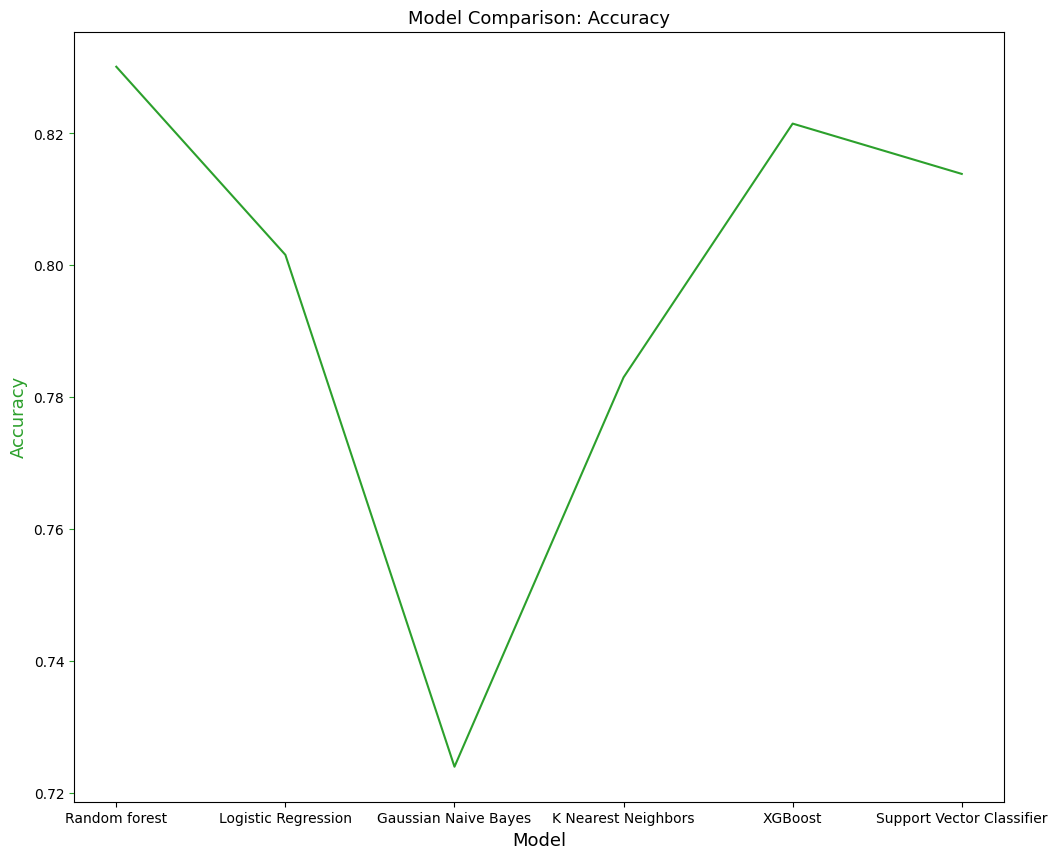

In [155]:
accuracy_scores = [accuracy_score(y_test,y_pred1), accuracy_score(y_test,y_pred2), accuracy_score(y_test,y_pred3), accuracy_score(y_test,y_pred4), accuracy_score(y_test,y_pred5), accuracy_score(y_test,y_pred6)]


model_data = {'Model': ['Random forest','Logistic Regression','Gaussian Naive Bayes','K Nearest Neighbors','XGBoost','Support Vector Classifier'],
              'Accuracy': accuracy_scores}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
               
ax1.set_ylabel('Accuracy', fontsize=13, color=color)
ax1 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax1.tick_params(axis='y', color=color)

We can observe that Random Forest and XGBoost performed better compared to other models. However, if speed is an important thing to consider, we can stick with Random Forest instead of XGBoost.